# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Selected Dataset**: TMDb Movie Data

**Data Description**: This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
<br>

- **`id `**: indicates the unique identifier of a movie
- **`imdb_id `**: indicates the unique identifier of a movie at The Movie Database
- **`popularity`**: indicates the popularity value of a movie
- **`budget`**: indicates the budget spent for a movie (likely to be in original currency)
- **`revenue`**: indicates the revenue earned by a movie (likely to be in original currency)
- **`original_title`**:  indicates the original title of a movie
- **`cast`**: indicates the cast of a movie
- **`homepage`**: indicates the homepage of a movie
- **`director`**: indicates the director of a movie
- **`tagline`**: indicates the tagline of a movie
- **`keywords`**: indicates the keywords of a movie
- **`overview`**: indicates the overview of a movie
- **`runtime`**: indicates the runtime of a movie
- **`genres`**: indicates the genre of a movie
- **`production_companies`**: indicates the production companies of a movie
- **`release_date`**: indicates the release date of a movie
- **`vote_count`**: indicates the vote count of a movie
- **`vote_average`**: indicates the vote average of a movie
- **`release_year`**: indicates the release year of a movie
- **`budget_adj`**: indicates the budget spent for a movie, adjusted for inflation
- **`revenue_adj`**: indicates the adjusted revenue of a movie, adjusted for inflation

Research Question 1 : Which year has the highest release of movies?

Research Question 2 : Which movie has the highest and lowest budget?
    
Research Question 3 : What is the average movie runtime from 1960 to 2015?
    
Research Question 4 : What is the correlation between popularity and revenue?

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [54]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [55]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [56]:
df.shape

(10866, 21)

In [57]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [58]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [59]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

### Data Cleaning (Removing The Unused Information From The Dataset)
> #### Information That We Need To Delete Or Modify
1. Dropping unused columns
2. Dropping duplicated rows
3. Updating datetime format of release date
4. Dropping columns with null values

**1. Dropping unused columns**
> Certain column(s) are unusable and therefore should be dropped.
> These columns include imdb_id, homepage, tagline, overview, cast, director, budget_adj and revenue_adj.

In [62]:
df.drop(['imdb_id','homepage','tagline','overview','cast','director','budget_adj','revenue_adj'],axis =1,inplace = True)

In [63]:
df.shape

(10866, 13)

In [64]:
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

**2. Dropping duplicated rows**
> Certain row(s) are duplicated and therefore should be dropped.

In [65]:
sum(df.duplicated())

1

In [66]:
df.drop_duplicates(inplace = True)

In [67]:
df.shape

(10865, 13)

**3. Updating datetime format of release date**
> release_date is in object type and should be updated to datetime format, refer to cells 7 and 8 for details.

**4. Dropping columns with null values**
> For the purposes of analysis, it is better to drop columns with null values.

In [68]:
df.dropna(how = 'any',inplace = True)

In [69]:
df.shape

(8701, 13)

##### Since now we have the columns, rows and format of the dataset in right way, its time to investigate the data for the questions asked. 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Which year has the highest release of movies?

In [70]:
df['release_year'].value_counts()[0:100]

2014    525
2013    457
2015    444
2009    414
2012    389
2011    386
2008    382
2007    351
2010    343
2006    327
2005    300
2004    237
2002    221
2003    214
1999    198
2001    196
2000    185
1996    182
1998    181
1997    174
1993    166
1994    164
1995    159
1990    123
1992    121
1988    120
1989    119
1991    111
1986    104
1987    104
1984     97
1985     96
1982     78
1981     74
1983     74
1980     72
1978     59
1973     55
1979     54
1971     54
1977     54
1966     44
1976     44
1974     43
1964     41
1975     40
1970     38
1968     36
1967     36
1972     36
1963     33
1965     33
1962     30
1960     30
1961     28
1969     25
Name: release_year, dtype: int64

> **It is concluded that year 2014 has the highest release of movies (525).**

In [79]:
### Research Question 2 : Which movie has the highest and lowest budget?

In [71]:
def return_highestlowest(x):
    min_index = df[x].idxmin()
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    print("Which movie has the highest "+ x + " : ",df['original_title'][high_index])
    print("Which movie has the lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

return_highestlowest('budget')

Which movie has the highest budget :  The Warrior's Way
Which movie has the lowest budget  :  Mr. Holmes


,2244,30
id,46528,280996
popularity,0.25054,3.92733
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
keywords,assassin|small town|revenge|deception|super speed,london|detective|sherlock holmes
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
production_companies,Boram Entertainment Inc.,BBC Films|See-Saw Films|FilmNation Entertainme...
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00


> **It is concluded that The Warrior's Way has the highest budget, whereas Mr. Holmes has the lowest budget.**

### Research Question 3 : What is the average movie runtime from 1960 to 2015?

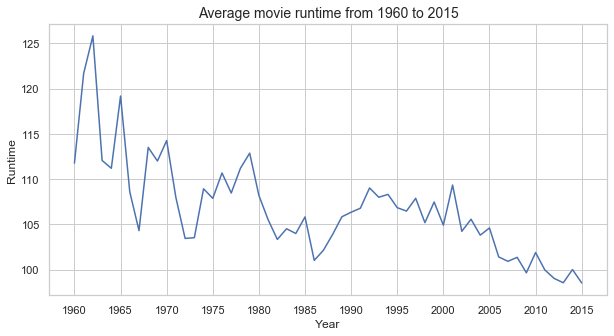

In [80]:
df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

sns.set(rc={'figure.figsize':(10,5)})

plt.title("Average movie runtime from 1960 to 2015",fontsize = 14)

plt.xlabel('Year',fontsize = 12)
plt.ylabel('Runtime',fontsize = 12)
sns.set_style("whitegrid")

> **From the line graph, it is concluded that the average movie runtime shows a decreasing trend from 1960 to 2015.**

### Research Question 4 : What is the correlation between popularity and revenue?

0.6593688704814512

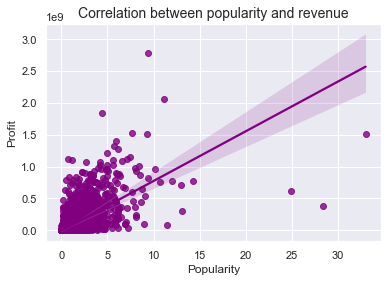

In [98]:
ax = sns.regplot(x=df['popularity'],y=df['revenue'],color='purple')

ax.set_title("Correlation between popularity and revenue",fontsize=14)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

sns.set(rc={'figure.figsize':(4,6)})


def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(df['popularity'],df['revenue'])

> **From the scatter plot, it is concluded that there is a positive relationship between popularity and revenue with a correlation coefficient of 0.66.**

Conclusions
The TMDb dataset provides many information of movies from 1960 to 2015. After dropping unused columns, dropping duplicated rows, updating datetime format of release date and dropping columns with null values, we conclude that:

- Year 2014 has the highest release of movies (525);
- The Warrior's Way has the highest budget, whereas Mr. Holmes has the lowest budget;
- The average movie runtime shows a decreasing trend from 1960 to 2015 and
- There is a positive relationship between popularity and revenue with a correlation coefficient of 0.66.

Note that even though we manage to analyse the above TMDb movie dataset, there are slight concerns regarding the data quality from the data sources, which may affect the overall analysis results.